In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

pd.options.display.max_rows = 14

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [7]:
X = mnist['data']
y = mnist['target']

X.shape, y.shape

((70000, 784), (70000,))

In [8]:
# dataset consits of 70k rows and 784 columns

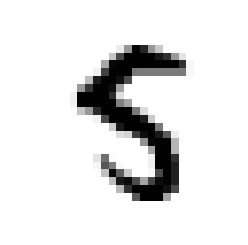

In [9]:
d = X[34911]
l = y[34911]

a = plt.imshow(d.reshape(28, 28), cmap = matplotlib.cm.binary)
a = plt.axis('off')


# Summarise the steps to train a binary classifier

In [10]:
mnist = fetch_mldata('MNIST original')
X = mnist['data']
y = mnist['target']
d = X[34911]
X_train, y_train = X[:60000], y[:60000]
X_test, y_test  = X[60000:], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
#shuffle_index
from sklearn.linear_model import SGDClassifier
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)
sgd_clf = SGDClassifier(random_state=42)
x = sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([d])

array([ True], dtype=bool)

In [11]:
# 1.split the data into train and test
# 2.shuffle the index randomly for train set of both feature and labels
# 3.set True if the label is 5 otherwise set False for both train and test sets of the labels
# 4.import any of the classifier 
# 5.apply fit function and then predict the value

# plot first 100 digits superimposed with their respective labels

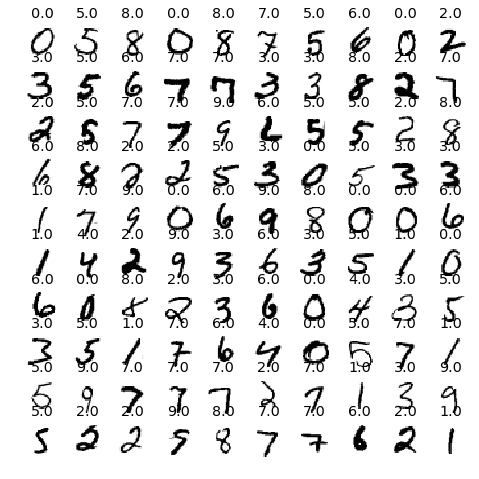

In [12]:
plt.figure(figsize=(8,8))
dp = X_train
lp = y_train
for i in range(100):
    a = plt.subplot(10,10,i+1)
    a = plt.imshow(dp[i].reshape(28, 28), cmap = matplotlib.cm.binary)
    a = plt.axis('off')
    b = plt.title(lp[i])

# try out predict() on a few other training observations

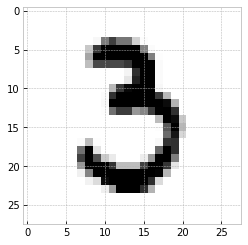

In [13]:
d1 = X[23456]
l1 = y[23456]

a = plt.imshow(d1.reshape(28, 28), cmap = matplotlib.cm.binary)

In [14]:
sgd_clf.predict([d1]),l1

(array([False], dtype=bool), 3.0)

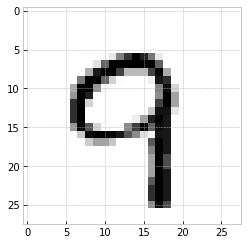

In [15]:
d2 = X[56782]
l2 = y[56782]

a = plt.imshow(d2.reshape(28, 28), cmap = matplotlib.cm.binary)

In [16]:
sgd_clf.predict([d2]),l2

(array([False], dtype=bool), 9.0)

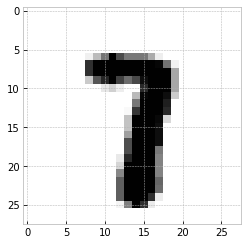

In [17]:
d3 = X[67852]
l3 = y[67852]

a = plt.imshow(d3.reshape(28, 28), cmap = matplotlib.cm.binary)

In [18]:
sgd_clf.predict([d3]),l3

(array([False], dtype=bool), 7.0)

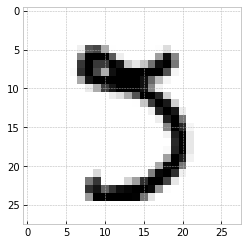

In [19]:
d4 = X[34576]
l4 = y[34575]

a = plt.imshow(d4.reshape(28, 28), cmap = matplotlib.cm.binary)

In [20]:
sgd_clf.predict([d4]),l4

(array([ True], dtype=bool), 5.0)

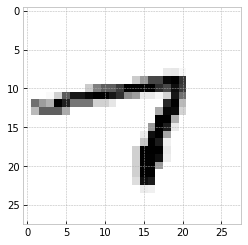

In [21]:
d5 = X[45768]
l5 = y[45768]

a = plt.imshow(d5.reshape(28, 28), cmap = matplotlib.cm.binary)

In [22]:
sgd_clf.predict([d5]),l5

(array([False], dtype=bool), 7.0)

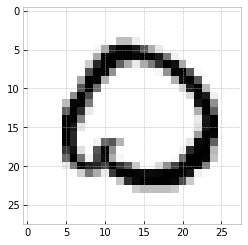

In [23]:
d6 = X[100]
l6 = y[100]

a = plt.imshow(d6.reshape(28, 28), cmap = matplotlib.cm.binary)

In [24]:
sgd_clf.predict([d6]),l6

(array([False], dtype=bool), 0.0)

# Use SGDClassifier for multi-classification

In [25]:
# onevsone classifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(sgd_clf)
x = ovo_clf.fit(X_train, y_train_5)
ovo_clf.predict([d1]),l1

(array([False], dtype=bool), 3.0)

In [26]:
y_scores1 = ovo_clf.decision_function([d1])
y_scores1
threshold = 0
y_scores1 > threshold

array([[ 1.5, -0.5]])

array([[ True, False]], dtype=bool)

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovo_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.95875,  0.9424 ,  0.96495])

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
def measure(clf,a,b):
    y_ps = cross_val_predict(clf, a, b, cv=3)
    p_s=precision_score(b, y_ps)
    r_s=recall_score(b, y_ps)
    f_s=f1_score(b, y_ps)
    return p_s,r_s,f_s

In [30]:
measure(sgd_clf, X_train, y_train_5)

(0.7279375103872362, 0.80796900940785832, 0.76586815876901559)

In [37]:
measure(ovr_clf,X_train, y_train_5)

(0.7279375103872362, 0.80796900940785832, 0.76586815876901559)

In [36]:
# onevsRest classifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(sgd_clf)
x = ovr_clf.fit(X_train, y_train_5)
ovr_clf.predict([d1]),l1

(array([False], dtype=bool), 3.0)

In [38]:
cross_val_score(ovr_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.95875,  0.9424 ,  0.96495])

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_ps = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 
confusion_matrix(y_train_5, y_ps)

array([[52942,  1637],
       [ 1041,  4380]])

# Use RandomForestClassifier for multi-classification

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfg_clf = RandomForestClassifier(random_state=42)

In [34]:
# onevsone classifier
ovo_clf1=OneVsOneClassifier(rfg_clf)
x = ovo_clf1.fit(X_train, y_train_5)
ovo_clf1.predict([d1]),l1

(array([False], dtype=bool), 3.0)

In [35]:
y_scores2 = ovo_clf1.decision_function([d1])
y_scores2
threshold = 0
y_scores2 > threshold

array([[ 1.,  0.]])

array([[ True, False]], dtype=bool)

In [39]:
cross_val_score(ovo_clf1, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9821,  0.9831,  0.9834])

# Guassian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
x=GNB.fit(X_train, y_train_5)
GNB.predict([d4]),l4

In [ ]:
cross_val_score(GNB, X_train, y_train_5, cv=3, scoring='accuracy')

In [ ]:
measure(GNB, X_train, y_train_5)

In [ ]:
x=GNB.fit(X_train_new1, y_train_new1_5)

In [ ]:
cross_val_score(GNB, X_train_new1, y_train_new1_5, cv=3, scoring='accuracy')

# Try to increase the size of the training dataset and check if accuracy is increased

In [132]:
from scipy.ndimage.interpolation import shift
def shift_image(image,x,y):
    image = image.reshape((28, 28))
    shifted_image = shift(image,[x,y],cval=0, mode="constant")
    return shifted_image.reshape([-1])

# by using shift function we can increase the size of a dataset

In [133]:
image = X_train[70]
shifted_image_down = shift_image(image, 5, 0)
shifted_image_left = shift_image(image, 0,-5)

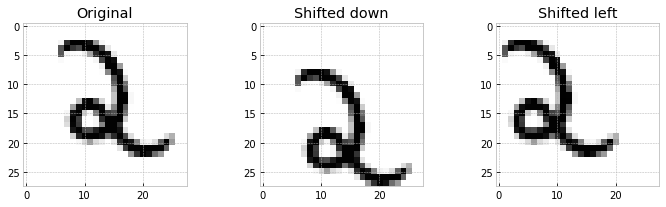

In [134]:
a=plt.figure(figsize=(12,3))
a=plt.subplot(1,3,1)
a=plt.title("Original")
a=plt.imshow(image.reshape(28, 28), cmap="Greys")
b=plt.subplot(1,3,2)
b=plt.title("Shifted down")
b=plt.imshow(shifted_image_down.reshape(28, 28), cmap="Greys")
c=plt.subplot(1,3,3)
c=plt.title("Shifted left")
c=plt.imshow(shifted_image_left.reshape(28, 28),  cmap="Greys")
plt.show()

In [155]:
shuffle_index1 = np.random.permutation(len(X_train_new))
X_train_new = X_train_new[shuffle_index1]
y_train_new = y_train_new[shuffle_index1]

In [156]:
values = ((1, 0), (-1, 0), (0, 1), (0, -1))
res1=[]
res2=[]
for x,y in values:
    for i,j in zip(X_train, y_train):
        res1.append(shift_image(i, x, y))
        res2.append(j)
X_train_new = np.array(res1)
y_train_new = np.array(res2)

In [157]:
X_train_new.shape

#train dataset is increased by shift function and it contains 240k r0ws and 784 columns

(240000, 784)

In [45]:
y_train_new_5 = (y_train_new == 5) 

In [46]:
a = sgd_clf.fit(X_train_new, y_train_new_5)

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [48]:
a = forest_clf.fit(X_train_new, y_train_new_5)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9823 ,  0.98215,  0.98305])

In [51]:
cross_val_score(forest_clf, X_train_new, y_train_new_5, cv=3, scoring='accuracy')

array([ 0.985025 ,  0.9858375,  0.9844875])

In [123]:
# by increasing the dataset accuracy increases slightly

In [178]:
X_train_new.shape,X_train.shape

((240000, 784), (60000, 784))

In [181]:
# adding increasing dataset to the original dataset

In [160]:
X_train_new1=np.concatenate([X_train,X_train_new],axis=0)
X_train_new1.shape
y_train_new1=np.concatenate([y_train,y_train_new],axis=0)
y_train_new1.shape

(300000, 784)

(300000,)

In [164]:
shuffle_index2 = np.random.permutation(len(X_train_new1))
X_train_new1 = X_train_new1[shuffle_index2]
y_train_new1 = y_train_new1[shuffle_index2]

In [165]:
y_train_new1_5 = (y_train_new1 == 5)

In [168]:
a1 = forest_clf.fit(X_train_new1, y_train_new1_5)

In [195]:
cross_val_score(forest_clf, X_train_new1, y_train_new1_5, cv=3, scoring='accuracy')

array([ 0.98722,  0.98738,  0.98727])

In [171]:
cross_val_score(forest_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9823 ,  0.98215,  0.98305])

In [179]:
# accuracy increases slightly by increasing the data

In [182]:
measure(forest_clf, X_train_new1, y_train_new1_5)

(0.98850671140939594, 0.86943368382217301, 0.92515457846697413)

In [184]:
measure(forest_clf, X_train, y_train_5)

(0.98577461658146259, 0.81811473897804832, 0.89415322580645151)

In [185]:
# pecisoin recall and f1 score increases for increasing dataset

# PR Curve and Threshold values

In [ ]:
from sklearn.metrics import precision_recall_curve

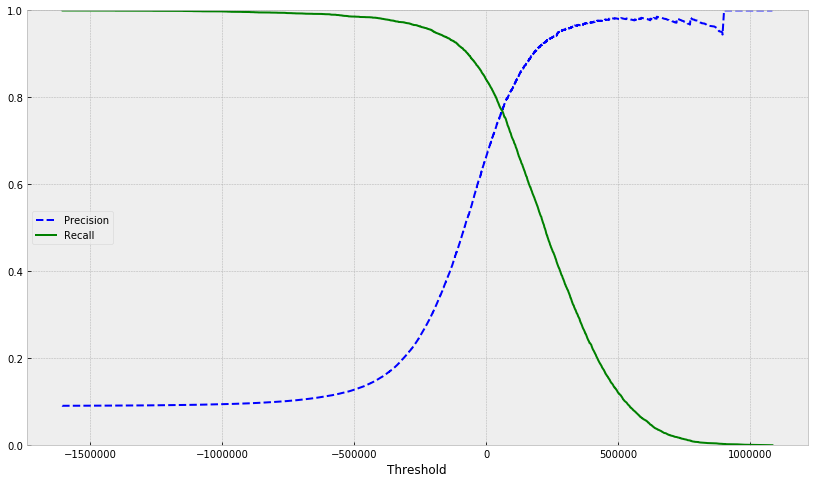

In [175]:
#PR curve for original dataset
def plot_pr_v_t(precisions, recalls, thresholds):
    plt.figure(figsize=(14,8))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim(0, 1)
    
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plot_pr_v_t(precisions, recalls, thresholds)

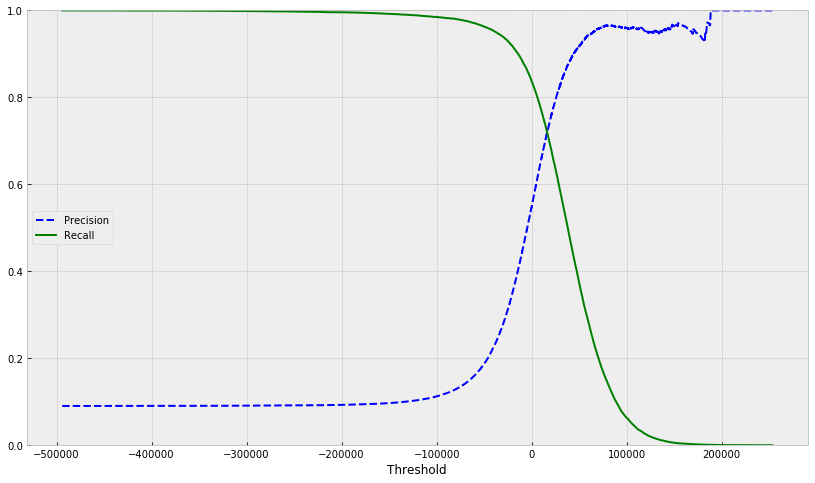

In [193]:
#PR curve for the dataset after increasing the training dataset
y_scores1 = cross_val_predict(sgd_clf, X_train_new1, y_train_new1_5, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_new1_5, y_scores1)
plot_pr_v_t(precisions, recalls, thresholds)

# roc_curve

In [116]:
y_scores = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method='predict_proba')
y_scores_fr = y_scores[:, 1] 

In [ ]:
from sklearn.metrics import roc_curve

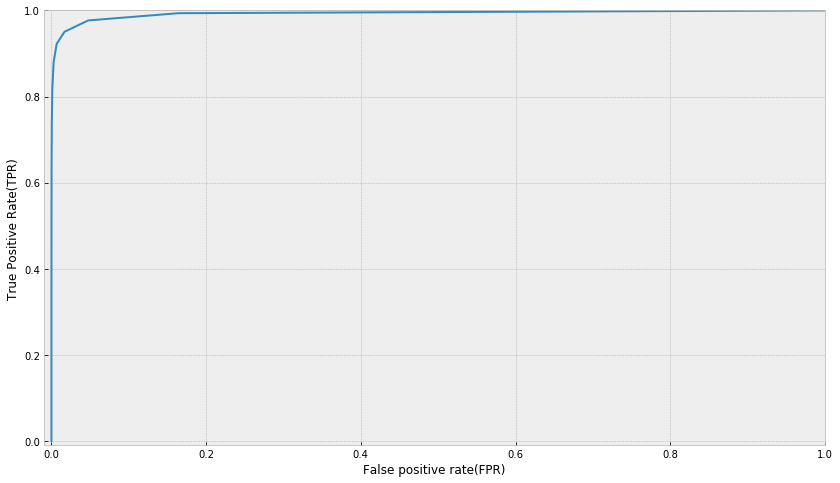

In [117]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(14,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([-0.01, 1, -0.01, 1])
    plt.xlabel('False positive rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_fr)
plot_roc_curve(fpr, tpr)

In [172]:
y_scores1 = cross_val_predict(forest_clf, X_train_new1, y_train_new1_5, cv=3,method='predict_proba')
y_scores_fr1 = y_scores1[:, 1] 

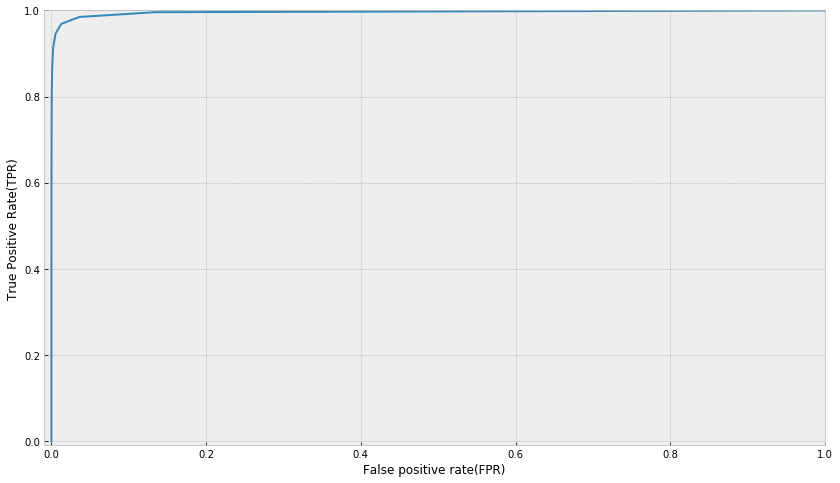

In [173]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(14,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([-0.01, 1, -0.01, 1])
    plt.xlabel('False positive rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')

fpr, tpr, thresholds = roc_curve(y_train_new1_5, y_scores_fr1)
plot_roc_curve(fpr, tpr)

In [187]:
from sklearn.metrics import roc_auc_score
1 - roc_auc_score(y_train_5, y_scores)
1 - roc_auc_score(y_train_new1_5, y_scores1)

0.040173651133594168

0.056112263042100485

# Check where the error is highest(one digit vs the others)

In [60]:

y_ps = cross_val_predict(sgd_clf, X_train, y_train, cv=3) 
high_error=confusion_matrix(y_train, y_ps)
high_error

array([[5487,    3,   71,   28,   44,   76,   57,    9,  132,   16],
       [   0, 6520,   33,   15,   17,   47,   12,   10,   67,   21],
       [  24,  101, 5051,  116,  111,   44,   79,   80,  301,   51],
       [  15,   63,  237, 5033,   58,  325,   33,   75,  178,  114],
       [   4,   28,   33,    6, 5215,   28,   32,   11,   84,  401],
       [  43,   44,   46,  180,  175, 4290,   91,   39,  355,  158],
       [  26,   31,   69,    8,  112,  149, 5433,    5,   69,   16],
       [   9,   47,   71,   34,  132,   27,    5, 5530,   29,  381],
       [  24,  276,  100,  173,  212,  288,   48,   32, 4449,  249],
       [  17,   35,   29,   67,  482,   64,    3,  218,   57, 4977]])

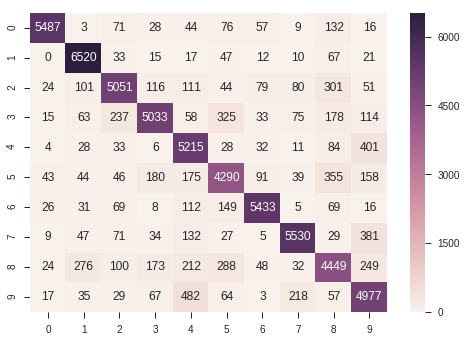

In [59]:
import seaborn as sns
sns.set(style="ticks")
ax = sns.heatmap(high_error, annot=True, fmt="d")

In [73]:
# checking the digit with one vs other digit
# 0 ------>8(132)
# 1 ------>8(67)
# 2 ------>8(301)
# 3 ------>5(325)
# 4 ------>9(401)
# 5 ------>8(355)
# 6 ------>5(149)
# 7 ------>9(381)
# 8 ------>5(288)
# 9 ------>4(482)